# Expected Frequency of S&P 500 Historical Returns vs Normal Distribution 

### Black swan events are rare and unpredictable outliers that are also referred to as “six sigma events”, meaning six standard deviation events. It is a concept of probabilistic risk modeling and is characterized by a price drop of six times the volatility (standard deviations) of an asset. Volatility is denoted by the lower case Greek letter σ (Sigma).
### A six sigma event assumes a 0.000000197% probability of occurrence. In other words once every 1.38 million years.
Source: [The Probability of Six Sigma Events](https://nox.im/posts/2021/1230/the-probability-of-six-sigma-events/)

### The empirical rule, sometimes called the 68-95-99.7 rule, says that for a random variable that is normally distributed, 68% of data falls within one standard deviation of the mean, 95% falls within two standard deviations of the mean, and 99.7% falls within three standard deviations of the mean.
Source: [The Normal Distribution](https://www.statology.org/the-normal-distribution/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import pylab
from scipy.stats import normaltest
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Read in S&P history since 1927
sp_history = pd.read_csv('Resources/sp_daily_history.csv', skiprows=9, index_col='Date')
sp_history = sp_history.rename({"Closing Value":"Close"}, axis=1)
sp_history['Daily_Ret'] = sp_history['Close'].pct_change()
sp_history = sp_history.dropna()
daily_ret = sp_history['Daily_Ret']
daily_ret

Date
1927-12-31    0.000000
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
                ...   
2023-02-17   -0.002767
2023-02-21   -0.020041
2023-02-22   -0.001574
2023-02-23    0.005329
2023-02-24   -0.010538
Name: Daily_Ret, Length: 24993, dtype: float64

In [3]:
# Daily return statistics
daily_ret.describe()

count    24993.000000
mean         0.000287
std          0.011836
min         -0.204669
25%         -0.004427
50%          0.000448
75%          0.005300
max          0.166096
Name: Daily_Ret, dtype: float64

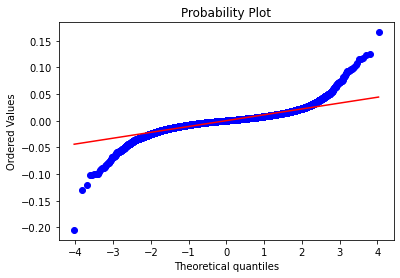

In [4]:
# Plot Probability Plot to test normal distribution of returns
stats.probplot(daily_ret, dist="norm", plot=pylab)
pylab.show()

Text(0.5, 0, 'Daily Return')

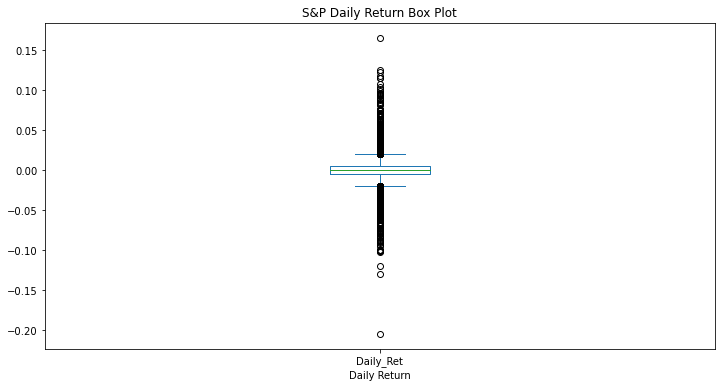

In [5]:
# Plot Box plot 
daily_ret.plot(kind='box', figsize=(12,6), title='S&P Daily Return Box Plot')
plt.xlabel('Daily Return')

(-0.25, 0.25)

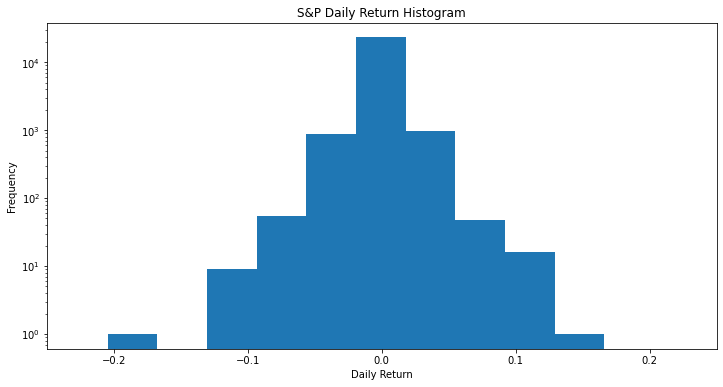

In [6]:
# Plot histogram of daily returns
daily_ret.plot(kind='hist', figsize=(12,6), title='S&P Daily Return Histogram', log=True)
plt.xlabel('Daily Return')
plt.xlim(-0.25,0.25)

In [7]:
# S&P 500 daily return standard deviation
sp_std_daily = daily_ret.std()
sp_std_daily

0.011836468768339338

In [8]:
# Calculate mean daily return
mean_ret = daily_ret.mean()
mean_ret

0.0002868643357527437

### The z-score, also referred to as standard score, z-value, and normal score, among other things, is a dimensionless quantity that is used to indicate the signed, fractional, number of standard deviations by which an event is above the mean value being measured. Values above the mean have positive z-scores, while values below the mean have negative z-scores. 
Source: [z-score calculator](https://www.calculator.net/z-score-calculator.html), [Stack Overflow](https://stackoverflow.com/questions/39951196/how-to-find-values-below-or-above-average)


In [9]:
# Calculate z-score
def zscore(s):
    return (s - np.mean(s)) / np.std(s)

In [10]:
# Calculate z-score of daily returns
zscore(daily_ret)

Date
1927-12-31   -0.024236
1928-01-03    0.454169
1928-01-04   -0.214521
1928-01-05   -0.834771
1928-01-06    0.505308
                ...   
2023-02-17   -0.258048
2023-02-21   -1.717447
2023-02-22   -0.157179
2023-02-23    0.426027
2023-02-24   -0.914515
Name: Daily_Ret, Length: 24993, dtype: float64

In [11]:
# Find values that are greater than (gt) three standard deviations of the mean on the downside
three_sigma = daily_ret[zscore(daily_ret).abs().gt(3)]
three_sigma_downside = three_sigma[three_sigma < 0]
three_sigma_downside

Date
1928-06-11   -0.035622
1928-12-06   -0.037799
1929-03-25   -0.040705
1929-05-22   -0.036576
1929-05-27   -0.036624
                ...   
2022-04-29   -0.036285
2022-05-05   -0.035650
2022-05-18   -0.040395
2022-06-13   -0.038768
2022-09-13   -0.043237
Name: Daily_Ret, Length: 210, dtype: float64

In [12]:
# Calculate probability of three sigma downside event based on S&P data
three_sigma_prob = len(three_sigma_downside) / len(daily_ret)
three_sigma_prob

0.008402352658744448

In [13]:
# Calculate expected frequency of three sigma downside event
three_sigma_freq = 1 / three_sigma_prob
print(f'Expected frequency of a three sigma downside event based on the S&P500 daily return history since 1927 is 1 in {three_sigma_freq} days. According to normal distributon, this type of event should occur once in 370 days (.27%)')

Expected frequency of a three sigma downside event based on the S&P500 daily return history since 1927 is 1 in 119.01428571428572 days. According to normal distributon, this type of event should occur once in 370 days (.27%)


In [14]:
# Find values that are greater than (gt) 6 standard deviations of the mean on the downside
six_sigma = daily_ret[zscore(daily_ret).abs().gt(6)]
six_sigma_downside = six_sigma[six_sigma < 0]
six_sigma_downside

Date
1929-10-28   -0.129403
1929-10-29   -0.101583
1929-11-06   -0.099213
1931-09-24   -0.072917
1932-05-31   -0.078351
1932-08-12   -0.080158
1932-09-12   -0.071754
1932-10-05   -0.081988
1933-07-20   -0.088793
1933-07-21   -0.087039
1934-07-26   -0.078280
1935-03-18   -0.100552
1935-04-16   -0.099671
1935-08-16   -0.079723
1935-11-16   -0.101132
1937-10-18   -0.092749
1938-09-10   -0.084859
1938-10-11   -0.076923
1940-05-14   -0.074707
1946-09-03   -0.099099
1987-10-19   -0.204669
1987-10-26   -0.082789
2008-09-29   -0.088068
2008-10-09   -0.076167
2008-10-15   -0.090350
2008-12-01   -0.089295
2020-03-09   -0.075970
2020-03-12   -0.095113
2020-03-16   -0.119841
Name: Daily_Ret, dtype: float64

In [15]:
# Calculate probability of six sigma downside event
six_sigma_prob = len(six_sigma_downside) / len(daily_ret)
six_sigma_prob

0.0011603248909694715

In [18]:
# Calculate expected frequency of six sigma downside event based on S&P data
six_sigma_freq = 1 / six_sigma_prob
print(f'Expected frequency of a six sigma downside event based on the S&P500 daily return history since 1927 is 1 in {six_sigma_freq} days. According to normal distributon, this type of event should occur once in 1.38 million years.')

Expected frequency of a six sigma downside event based on the S&P500 daily return history since 1927 is 1 in 861.8275862068965 days. According to normal distributon, this type of event should occur once in 1.38 million years.


In [17]:
#  When did 17 sigma event occur?
daily_ret[zscore(daily_ret).abs().gt(17)]

Date
1987-10-19   -0.204669
Name: Daily_Ret, dtype: float64